<a href="https://colab.research.google.com/github/coolphotography/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [1]:
# Import libraries
# Basic libs
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# Ignore  the warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
# GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation

# kmeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### **Data Set Overview**

In [2]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Load the data**

In [3]:
# Read the data
# converts csv file to DataFrame.
netflix_df = pd.read_csv('/content/drive/MyDrive/capstone project - 4/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

**First Five Observations**

In [4]:
# Observing the first five observations using head()
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


OBSERVATION:

We can notice the dataset has Nan values. This looks like a typical movies/TV shows dataset without user ratings.

**Last Five Observations**

In [5]:
# Observing the last five observations using tail()
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


**Shape of the Data**

In [6]:
netflix_df.shape

(7787, 12)

The provided data consists of over 7787 observations with 12 column variables.

**Feature Data Types**

In [7]:
# Observing the data types for all the columns.
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


Few columns- director, cast, country, date_added, and rating contain null values.

The dataset consists of eleven non- numeric columns and one numeric column.

In [8]:
# Feature Statistics Summary
# Provides the statistical details for each column.
netflix_df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### **Removing Null Values, Duplicate Values**

In [9]:
# For missing data
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

There are 2389 null values in director, 718 null values in cast, 507 null values in country, 10 null values in date_added, and 7 null values in rating.

* 'Director' feature has 30.68% null values. 
* 'Cast' feature has 9.22% null values.
* 'Country' feature has 6.51% null values.
* 'date_added' ffeature has 0.13% null values.
* 'rating' feature has 0.09% null values.


In [10]:
# dropping NaN values from date_added, rating
# filling director, cast, country - NaN values with No Director, No Cast, Country Not Available respectively.
# Due to the high number of null values in director, cast, and country, dropping them would lead to imbalanced data 
# and incorrect EDA analysis. Therefore, they are retained.

netflix_df['director'].fillna('No Director', inplace=True)
netflix_df['cast'].fillna('No Cast', inplace=True)
netflix_df['country'].fillna('Country Not Available', inplace=True)
netflix_df.dropna(subset=['date_added','rating'],inplace=True)
netflix_df = netflix_df.reset_index(drop=True)

SIDE NOTE:

Instead of dropping all Nan values, only date_added and rating Nan values are removed. Dropping director, cast, and country Nan values would have resulted in a significant loss of data.

In [11]:
# Updated dataframe
netflix_df.shape

(7770, 12)

In [12]:
# Rechecking for clean data.
netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [13]:
#Checking Unique values in each variable
netflix_df.nunique()

show_id         7770
type               2
title           7770
director        4048
cast            6818
country          682
date_added      1563
release_year      73
rating            14
duration         216
listed_in        491
description     7752
dtype: int64

A show_id is a unique identifier, and no title is repeated. A number of unique values are also contained in director, cast, country, date_added, listed_in, and description.

In [14]:
# Checking for duplicate values
list(netflix_df[netflix_df.duplicated()].sum(axis = 1))

[]

###**Exploratory Data Analysis**

Text(0.5, 1.0, 'Count of Movies and TV Shows')

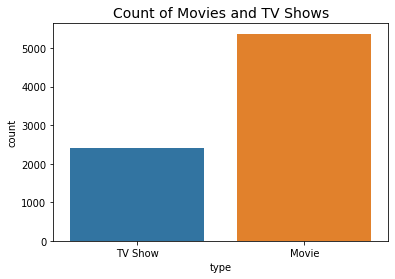

In [15]:
# Netflix Film Types: Movie or TV Show
sns.countplot(x="type", data=netflix_df)
plt.title("Count of Movies and TV Shows", fontsize=14)

Text(0.5, 1.0, 'Pie representation of Movies and TV Shows')

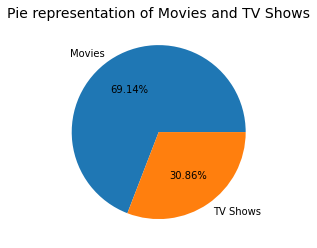

In [16]:
# Pie Chart Representation - Netflix Film Types: Movie or TV Show
plt.pie(netflix_df.type.value_counts(),labels=["Movies","TV Shows"],autopct="%1.2f%%")
plt.title("Pie representation of Movies and TV Shows", fontsize=14)

OBSERVATION:

There are more than 5000+ movies and 2000+ TV shows.It should be noted that a TV Show has at least one season with many episodes, so the TV Shows count being less than Movies is logical.

Text(0.5, 1.0, 'Ratings for Movies & TV Shows')

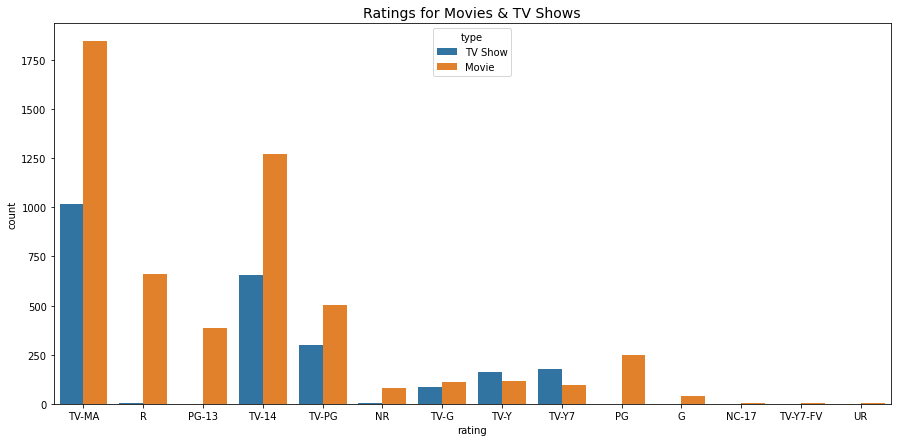

In [17]:
# Netflix Film Ratings
plt.figure(figsize=(15,7))
sns.countplot(x="rating", data=netflix_df, hue='type')
plt.title("Ratings for Movies & TV Shows", fontsize=14)

OBSERVATION:

The NR and UR stand for Non-Rated and UnRated content, so they could be ignored. The number of mature content movies is greater than the number of mature content TV shows. The majority of TV shows are geared toward younger viewers.

In [18]:
# Extracting month and year from date.
netflix_df1 = netflix_df.copy()
netflix_df1['date_added'] = pd.to_datetime(netflix_df1['date_added'])
netflix_df1['month_added'] = netflix_df1['date_added'].dt.month
netflix_df1['year_added'] = netflix_df1['date_added'].dt.year

Text(0.5, 1.0, 'Heatmap - year_added and month_added')

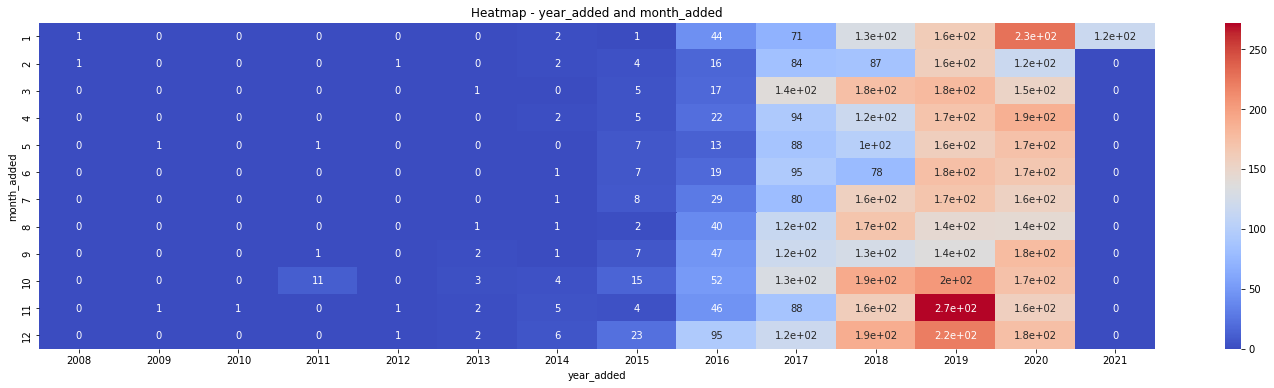

In [19]:
# Plotting year vs month on heatmap.
plt.figure(figsize = (25, 6))
sns.heatmap(netflix_df1.groupby('year_added').month_added.value_counts().unstack().fillna(0).T, cmap = 'coolwarm', annot = True)
plt.title("Heatmap - year_added and month_added")

OBSERVATION:

1. From 2014 the number of shows have increased. The data given to us stops at 2021 January.
2. In 2018, 2019, and 2020, the majority of films were released.
3. A large number of movies and TV Shows were released in October, November, December, and January.

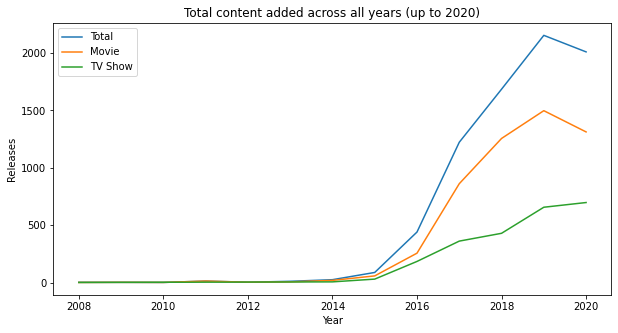

In [20]:
# Amount of Content as a Function of Time
netflix_year = netflix_df1.year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
total_year = netflix_year[netflix_year.year != 2021]
netflix_movie_year = netflix_df1[netflix_df1['type'] == 'Movie'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
movie_year = netflix_movie_year[netflix_movie_year.year!= 2021]
netflix_tvshow_year = netflix_df1[netflix_df1['type'] == 'TV Show'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
tvshow_year = netflix_tvshow_year[netflix_tvshow_year.year!= 2021]

plt.figure(figsize = (10, 5))
sns.lineplot(data=total_year, x='year', y='count')
sns.lineplot(data=movie_year, x='year', y='count')
sns.lineplot(data=tvshow_year, x='year', y='count')
plt.title('Total content added across all years (up to 2020)')
plt.ylabel('Releases')
plt.xlabel('Year')
plt.legend(['Total','Movie','TV Show'])

OBSERVATION:

**Is Netflix has increasingly focusing on TV rather than movies in recent years?**

The number of movies in 2020 have reduced compared to its previous year. However the TV shows have increased.

Text(0.5, 1.0, 'Duration Distribution for Netflix Movies')

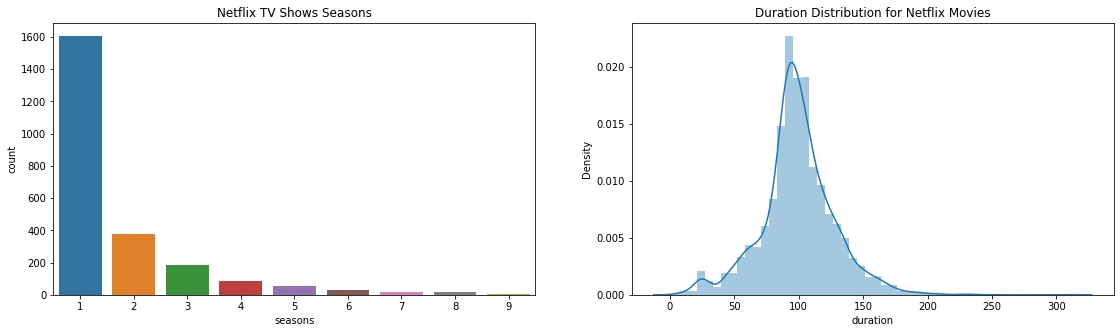

In [21]:
# Netflix Film Duration
fig, ax = plt.subplots(1,2, figsize=(19, 5))
show_duration_df = pd.DataFrame(netflix_df1[netflix_df1.type == 'TV Show'].duration.replace(['1 Season'], '1 Seasons').str.replace(' Seasons','').sort_values()).astype(int)
plt1 = sns.countplot(data = show_duration_df, x = 'duration', order = list(range(1,10)), ax=ax[0])
plt1.set_xlabel('seasons')
plt1.set_title("Netflix TV Shows Seasons")
movie_duration_df = pd.DataFrame(netflix_df1[netflix_df1.type == 'Movie'].duration.str.replace(' min', '').astype(int))
plt2 = sns.distplot(movie_duration_df.duration, ax=ax[1])
plt2.set_title("Duration Distribution for Netflix Movies")

OBSERVATION:

Seasons of Netflix TV shows are right-skewed and most have only one season. Netflix movies have a normal distribution with a mean of 100 minutes.

Text(0, 0.5, 'Country')

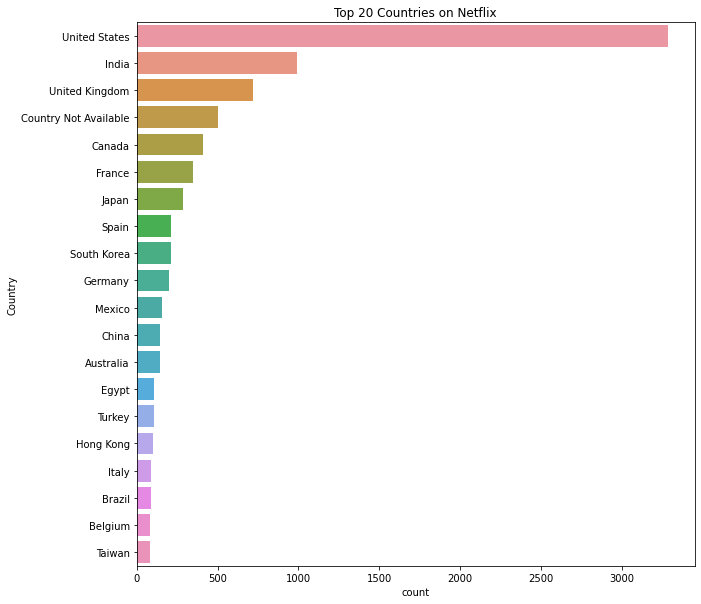

In [22]:
# Countries with the most content available
countries = netflix_df1['country'].str.split(', ', expand=True).stack().reset_index(level = 1, drop = True)
countries = countries[countries != 'Country Not available']
plt.figure(figsize = (10, 10))
sns.countplot(y = countries, order=countries.value_counts().index[:20])
plt.title('Top 20 Countries on Netflix')
plt.ylabel('Country')

OBSERVATION:


knowing that Netflix is an American brand, it is no surprise that the United States is the most popular country to watch Netflix in. In second place is India, followed by the UK and Canada. 

Text(0, 0.5, 'genres')

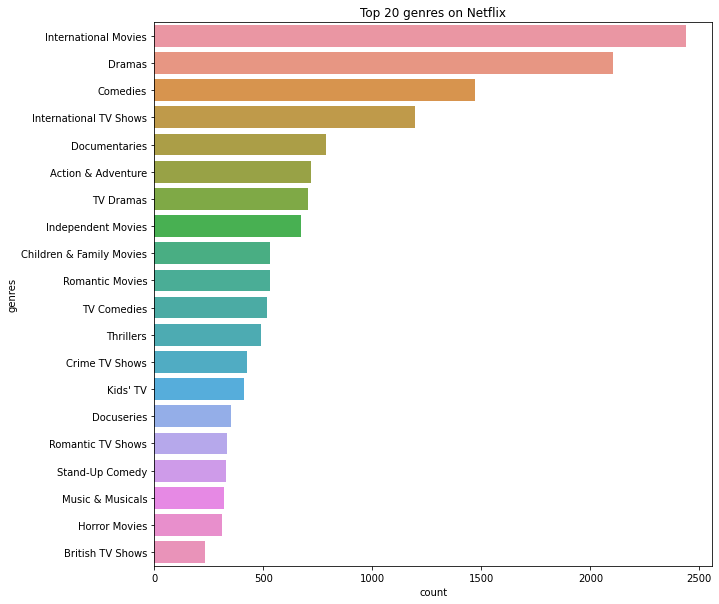

In [23]:
# Popular Genres
genres = netflix_df1['listed_in'].str.split(', ', expand=True).stack().reset_index(level = 1, drop = True)
plt.figure(figsize = (10, 10))
sns.countplot(y = genres, order=genres.value_counts().index[:20])
plt.title('Top 20 genres on Netflix')
plt.ylabel('genres')

OBSERVATION:

On Netflix, international movies are the most popular genre, followed by dramas and comedies. With Netflix having a lot of international subscribers, it makes sense to have international movies at the top.

Text(0, 0.5, 'director')

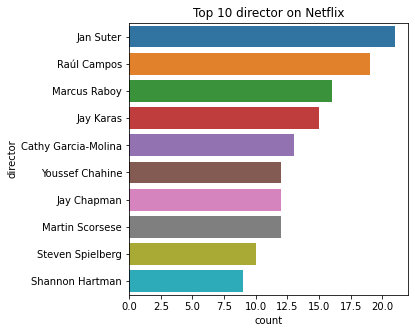

In [24]:
# top 10 directors on Netflix with the most releases
director = netflix_df1['director'].str.split(', ', expand=True).stack().reset_index(level = 1, drop = True)
director = director[director != 'No Director']
plt.figure(figsize = (5, 5))
sns.countplot(y = director, order=director.value_counts().index[:10])
plt.title('Top 10 director on Netflix')
plt.ylabel('director')

OBSERVATION:

The number of international movies is higher, so it should come as no surprise that the most movie directors are international. 

Text(0, 0.5, 'cast')

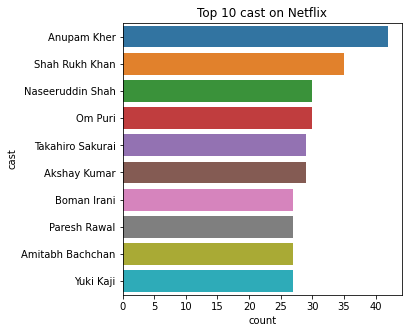

In [25]:
# top 10 actors on Netflix based on number of titles
cast = netflix_df1[netflix_df1['cast'] != 'No Cast'].cast.str.split(', ', expand = True).stack().reset_index(level = 1, drop = True)
plt.figure(figsize = (5, 5))
sns.countplot(y = cast, order=cast.value_counts().index[:10])
plt.title('Top 10 cast on Netflix')
plt.ylabel('cast')

OBSERVATION:

Top actors are mainly international actors implying that Netflix has many international subscribers.

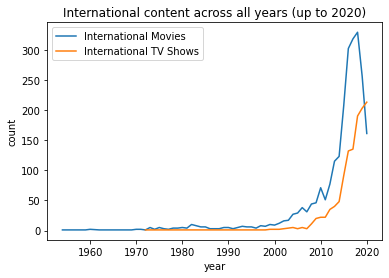

In [26]:
# International Content across years.
international_movies = netflix_df1[netflix_df1['listed_in'].str.contains('International Movies')]
international_movies = pd.DataFrame(international_movies['release_year'].value_counts()).reset_index().rename(columns={'index': 'year','release_year':'count'})
international_movies = international_movies[international_movies.year != 2021]

international_tvshow = netflix_df1[netflix_df1['listed_in'].str.contains('International TV Shows')]
international_tvshow = pd.DataFrame(international_tvshow['release_year'].value_counts()).reset_index().rename(columns={'index': 'year','release_year':'count'})
international_tvshow = international_tvshow[international_tvshow.year != 2021]

sns.lineplot(data=international_movies, x='year', y='count')
sns.lineplot(data=international_tvshow, x='year', y='count')
plt.title("International content across all years (up to 2020)")
plt.legend(['International Movies','International TV Shows'])

OBDERVATION:

More international movies are released than international television shows. The **growth** of international movies started to reduce in 2018 and international TV shows started to slow down in 2019.

SUMMARY SO FAR:

1. The most content type on Netflix is movies.
2. The largest count of Netflix content is made with a 'TV-MA' rating.
3. After 2014 the amount of content added has been increasing significantly.
4. **The number of movies in 2020 have reduced compared to its previous year. However the TV shows have increased.**
5. While most TV seasons have only 1 season, movie lengths follow a normal distribution with a mean of 100 minutes.
6. According to the amount of content produced, the United States is the top country.
7. International Movies are a genre mostly found on Netflix.
8. In terms of titles, Jan Suter is the most popular director on Netflix.
9. Anupam Kher is the most popular Netflix cast member, according to number of movies made.
10. In 2018, 2019, and 2020, the majority of films were released.
11. A large number of movies and TV Shows were released in October, November, December, and January.